# Introduction

Visualisation data for the year 2017 showing:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Step 1



In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2

In [41]:
netflix_stocks = pd.read_csv("NFLX.csv")
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [42]:
dowjones_stocks = pd.read_csv("DJI.csv")
dowjones_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


In [43]:
netflix_stocks_quarterly = pd.read_csv("NFLX_daily_by_quarter.csv")
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


## Step 3

In [44]:
netflix_stocks.rename(columns={"Adj Close": "Price"}, inplace=True)
netflix_stocks_quarterly.rename(columns={"Adj Close": "Price"}, inplace=True)
dowjones_stocks.rename(columns={"Adj Close": "Price"}, inplace=True)

In [45]:
netflix_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


## Step 4

Distributions

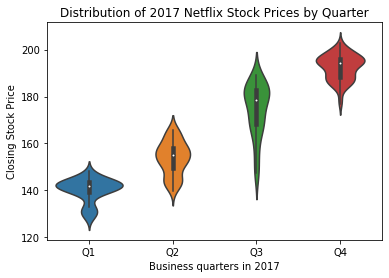

In [46]:
ax = sns.violinplot(data=netflix_stocks_quarterly, x="Quarter", y="Price")
ax.set_title("Distribution of 2017 Netflix Stock Prices by Quarter")
ax.set_xlabel("Business quarters in 2017")
ax.set_ylabel("Closing Stock Price")
plt.show()

## Step 5
Revenue & Profit


([<matplotlib.axis.XTick at 0x1d4400fee88>,
 <a list of 4 Text xticklabel objects>)

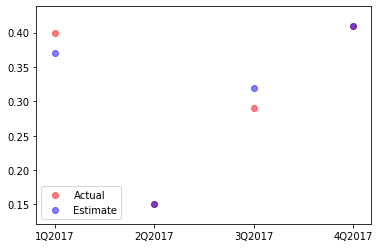

In [47]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]
plt.scatter(x_positions, earnings_actual, color="red", alpha=0.5)
plt.scatter(x_positions, earnings_estimate, color="blue", alpha=0.5)
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)

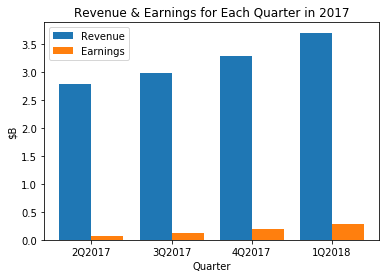

In [48]:
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1
t = 2 
d = 4 
w = 0.8 
bars1_x = [t*element + w*n for element
             in range(d)]

# Earnings
n = 2  
t = 2
d = 4
w = 0.8
bars2_x = [t*element + w*n for element
             in range(d)]

middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]

plt.bar(bars1_x, revenue_by_quarter)
plt.bar(bars2_x, earnings_by_quarter)
plt.xticks(middle_x, quarter_labels)
plt.xlabel("Quarter")
plt.ylabel("$B")
plt.legend(labels)
plt.title("Revenue & Earnings for Each Quarter in 2017")
plt.show()

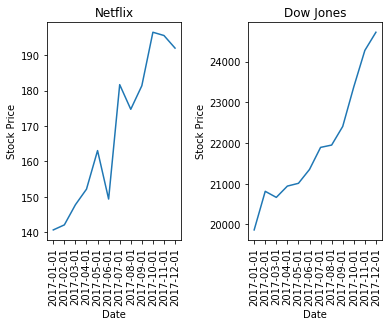

In [49]:
# Left plot Netflix
# ax1 = plt.subplot(total number rows, total number columns, index of subplot to modify)
ax1 = plt.subplot(1,2,1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'])
plt.title("Netflix")
plt.xlabel("Date")#
plt.ylabel("Stock Price")
plt.xticks(rotation=90)

ax2 = plt.subplot(1,2,2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
plt.title("Dow Jones")
plt.xlabel("Date")#
plt.ylabel("Stock Price")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
plt.show()


